# Analyse des bandes électroniques du cristal Ba2BiAu

### Imports : 

In [95]:
from numpy import *
import matplotlib.pyplot as plt
import matplotlib.image as img
from pymatgen.ext.matproj import MPRester
from pymatgen.electronic_structure import plotter
from pymatgen.electronic_structure import *
from tabulate import tabulate 

### Téléchargement du fichier : 

In [96]:
with MPRester("bfWHOpdayyP1LUqo") as m:

    # Structure for material id
    bandstructure = m.get_bandstructure_by_material_id("mp-862947")

### Détermination et représentation de la bande interdite : 

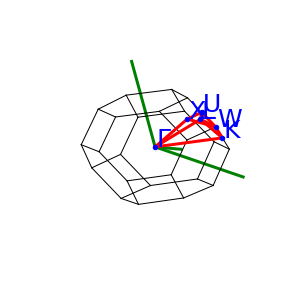

Voici la zone de brillouin où nous allons étudier la bande interdite.


In [97]:
BsPlotter = plotter.BSPlotter(bandstructure)
BsPlotter.plot_brillouin()
print("Voici la zone de brillouin où nous allons étudier la bande interdite.")

### Initialisation des données et graphe des bandes : 


----------  ---------------------------------------
direct      False
energy      0.4192 eV
transition  (0.400,0.400,0.400)-(0.220,0.000,0.220)


<module 'matplotlib.pyplot' from '/usr/local/lib64/python3.6/site-packages/matplotlib/pyplot.py'>

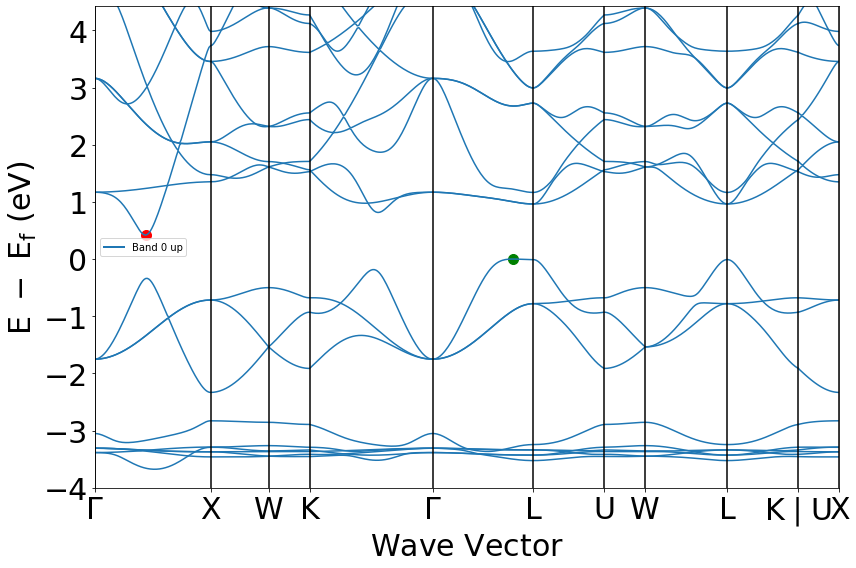

In [98]:
data = BsPlotter.bs_plot_data()
eFermi = data.get('zero_energy')
distance = data.get('ticks').get('distance')
distances = data.get('distances')
energy = data.get('energy')
bandgap = bandstructure.get_band_gap()
vbmData = bandstructure.get_vbm()
cbmData = bandstructure.get_cbm()
vbms = data.get('vbm')
cbms = data.get('cbm')
hbar2 = ((6.62607004*10**(-34))/(2*pi))**2
electronvolt = 1.602176634*10**(-19)
angstrom = 10**(-10) 
cles = []
for i in bandgap.keys() : 
    cles.append(i)
print(tabulate([[cles[0] ,str(bandgap.get('direct'))],
	            [cles[1] ,str(bandgap.get('energy'))+" eV"],
	            [cles[2] ,str(bandgap.get('transition'))]],
	            headers=["",""]))
BsPlotter.get_plot(vbm_cbm_marker=True)

On distingue bien sur notre graphique le point rouge qui correspond au minimum de la bande de conduction et le point vert au maximum de la bande de valence. 

Comme précisé dans bandgap ('direct' = False), le gap est indirect. 

La transition est moins probable due au caractère indirect. Celle-ci s'opère selon le chemin décrit dans 'transition' : 
(0.40,0.40,0.40)->(0.22,0.00,0.22)

On constate aussi que notre matériau est conducteur : le gap vaut 0.4192eV. 


### Analyse de la première bande de conduction : 

In [99]:
print("Minimum de la première bande de conduction : ")
print(tabulate([["Bande(s) contenant le CBM : ",str(cbmData.get('band_index'))],
	            ["Énergie du CBM : ",str(cbmData.get('energy'))+" eV"],
	            ["(sur le graphe MP (E-Efermi) : ",str(cbmData.get('energy')-eFermi)+" eV)"]],
	            headers=["",""]))

Minimum de la première bande de conduction : 

------------------------------  -------------------------------------------------
Bande(s) contenant le CBM :     defaultdict(<class 'list'>, {<Spin.up: 1>: [18]})
Énergie du CBM :                3.5168 eV
(sur le graphe MP (E-Efermi) :  0.4192 eV)


La première bande de conduction est donc la bande 18. 

### Analyse de la dernière bande de valence : 

In [100]:
print("Maximum de la dernière bande de valence : ")
print(tabulate([["Bande(s) contenant le VBM : ",str(vbmData.get('band_index'))],
	            ["Énergie du VBM : ",str(vbmData.get('energy'))+" eV"],
	            ["(sur le graphe MP (E-Efermi) : ",str(vbmData.get('energy')-eFermi)+" eV)"]],
	            headers=["",""]))

Maximum de la dernière bande de valence : 

------------------------------  -------------------------------------------------
Bande(s) contenant le VBM :     defaultdict(<class 'list'>, {<Spin.up: 1>: [17]})
Énergie du VBM :                3.0976 eV
(sur le graphe MP (E-Efermi) :  0.0 eV)


La dernière bande de valence est donc la bande 17.

### Analyse de la dispersion : 

In [101]:
#calcule la pente sur l'intervalle (x,y)
#renvoit un tableau pour un affichage pratique des flèches : 
#    pour chaque intervalle entre 2 kpoints : [pente,x_0,y_0,dx,dy]
def slope(x,y):
	return array([abs((y[-1]-y[0])/(x[-1]-x[0])),x[0],y[0],x[-1]-x[0],y[-1]-y[0]])

#calcule la dispersions maximale et minimale de la bande y
#retourne : s=tableau des résultats retournés par slope pour chaque intervalle de kpoints
#           l'indice de la pente maximale dans s
#           l'indice de la pente minimale dans s
def computeDispersions(y):
    slopes = zeros((len(distances),5))
    for i in range(len(slopes)):
        slopes[i] = slope(distances[i],energy.get('1')[i][y])
    s = (slopes.T)
    return (s,argmax(s[0]),argmin(s[0]))

(cbs,maxCb,minCb) = computeDispersions(18)
(vbs,maxVb,minVb) = computeDispersions(17)

Text(4.62429489522349, -0.4780999999999997, '-')

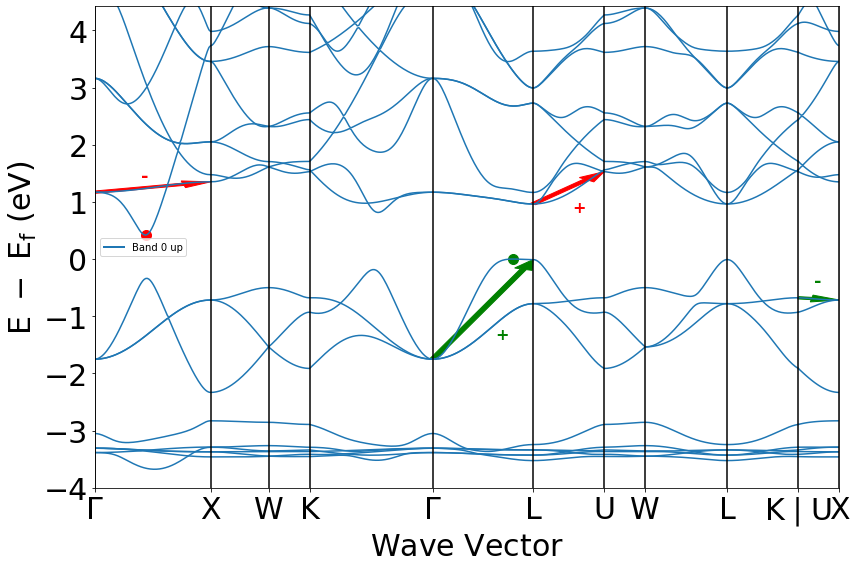

In [102]:
BsPlotter.get_plot(vbm_cbm_marker=True)
plt.arrow(cbs[1,maxCb],cbs[2,maxCb],cbs[3,maxCb],cbs[4,maxCb],color='red',width=0.04,length_includes_head=True)
plt.arrow(cbs[1,minCb],cbs[2,minCb],cbs[3,minCb],cbs[4,minCb],color='red',width=0.04,length_includes_head=True)
plt.arrow(vbs[1,maxVb],vbs[2,maxVb],vbs[3,maxVb],vbs[4,maxVb],color='green',width=0.04,length_includes_head=True)
plt.arrow(vbs[1,minVb],vbs[2,minVb],vbs[3,minVb],vbs[4,minVb],color='green',width=0.04,length_includes_head=True)

plt.text(cbs[1,maxCb]+0.25,cbs[2,maxCb]-0.15,"+",fontsize=16,fontweight='bold',color='red')
plt.text(cbs[1,minCb]+0.3,cbs[2,minCb]+0.2,"-",fontsize=18,fontweight='bold',color='red')
plt.text(vbs[1,maxVb]+0.4,vbs[2,maxVb]+0.35,"+",fontsize=16,fontweight='bold',color='green')
plt.text(vbs[1,minVb]+0.1,vbs[2,minVb]+0.2,"-",fontsize=18,fontweight='bold',color='green')

### Détermination de la masse effective 

Nous allons ici considérer la base de la première bande de conduction et le sommet de la dernière bande de valence. Nous allons supposer une dispersion parabolique.
Voici également la formule de la masse effective : 
$$ \left (\frac{1}{m}\right)_{i,j} = \frac{1}{\hbar^2} \frac{\partial^2 E}{\partial k_i \partial k_j}$$

Bande de valence
--------------------------  ---------------------------------------------------------------------
Parabole d'approximation :  y(k) = -0.6936661431239868k² + 3.7406336659021537k -5.042870726055274
Dérivée seconde :           -1.3873322862479736 eVÅ²
Masse effective :           -5.003356179857478e-30 kg


Bande de conduction
--------------------------  -------------------------------------------------------------------
Parabole d'approximation :  y(k) = 6.387813099583381k² + -4.514734297071725k 1.2128680777035874
Dérivée seconde :           12.775626199166762 eVÅ²
Masse effective :           5.433250362606353e-31 kg


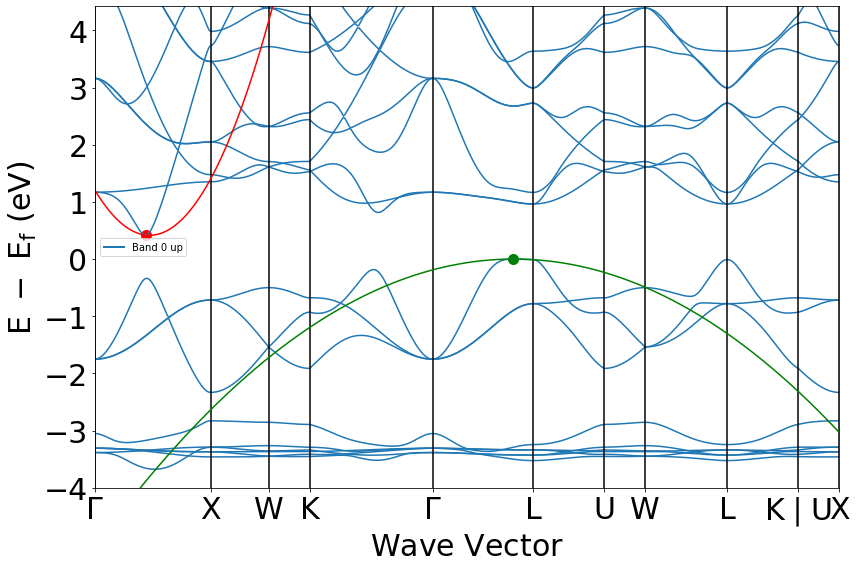

In [107]:
BsPlotter.get_plot(vbm_cbm_marker = True,bs_labels=[])

#Création des arrays de valeurs  
#pour la bande de valence :
k_v = zeros(3)
epsilon_v = zeros(3)
k_v[0] = distances [4] [-2]
k_v[1] = vbms[0][0]
k_v[2] = distances [5] [1]

epsilon_v[0] = energy.get('1')[4][17][-2]
epsilon_v[1] = vbms[0][1]
epsilon_v[2] = energy.get('1')[5][17][1]

#Création des arrays de valeurs 
#pour la bande de conduction :
k_c = zeros(3)
epsilon_c = zeros(3) 

k_c[0] = distances [0] [-2]
k_c[1] = cbms[0][0]
k_c[2] = distances [0] [1]

epsilon_c[0] = energy.get('1')[0][18][-2]
epsilon_c[1] = cbms[0][1]
epsilon_c[2] = energy.get('1')[0][18][1]
    
#Interpolation quadratique et print&plot : valence
f_v = polyfit(k_v, epsilon_v, 2) 
abs_v = linspace(distances[0][0],distances[9][-1],1000)
plt.plot(abs_v,polyval(f_v,abs_v),'g')
print(tabulate([["Parabole d'approximation : ","y(k) = "+str(f_v[0])+"k\u00b2 + "+str(f_v[1])+"k "+str(f_v[2])],
	            ["Dérivée seconde : ",str(2*f_v[0])+" eV\u212b\u00b2"],
                ["Masse effective : ",str(hbar2/(2*f_v[0]*electronvolt*(angstrom)**2))+" kg"]],
	            headers=["Bande de valence",""]))
print("\n")
#Interpolation quadratique et print&plot : conduction
f_c = polyfit(k_c, epsilon_c, 2)
abs_c = linspace(distances[0][0],distances[9][-1],1000)
plt.plot(abs_c,polyval(f_c,abs_c),'r')
print(tabulate([["Parabole d'approximation : ","y(k) = "+str(f_c[0])+"k\u00b2 + "+str(f_c[1])+"k "+str(f_c[2])],
	            ["Dérivée seconde : ",str(2*f_c[0])+" eV\u212b\u00b2"],
                ["Masse effective : ",str(hbar2/(2*f_c[0]*electronvolt*(angstrom)**2))+" kg"]],
	            headers=["Bande de conduction",""]))

